In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path='/content/drive/MyDrive/walmart Retail Data.xlsx'
data=pd.read_excel(path)
data.describe()

In [ ]:
data['order date'] = pd.to_datetime(data['Order Date'])  # Replace 'Order Date' with the actual column name
data['ship date'] = pd.to_datetime(data['Ship Date'])  # Replace 'Ship Date' with the actual column name

In [ ]:
data['shipping_duration'] = (data['Ship Date'] - data['Order Date']).dt.days
data['shipping_duration'].describe()


,shipping_duration
count,8399.000000
mean,2.032028
std,2.301371
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,92.000000


In [ ]:
threshold = 4
data['delayed'] = data['shipping_duration'] > threshold

In [ ]:
# Delayed shipments by region
delayed_by_region = data[data['delayed']].groupby('Region')['delayed'].count()

# Delayed shipments by state
delayed_by_state = data[data['delayed']].groupby('State')['delayed'].count()

# Delayed shipments by shipping mode
delayed_by_ship_mode = data[data['delayed']].groupby('Ship Mode')['delayed'].count()

print(delayed_by_region)
print(delayed_by_state)
print(delayed_by_ship_mode)

Region
Central    261
East       176
South      152
West       198
Name: delayed, dtype: int64
State
Alabama            9
Arizona           17
Arkansas          12
California        79
Colorado          20
Connecticut       10
Delaware           1
Florida           45
Georgia           18
Idaho             11
Illinois          40
Indiana           23
Iowa              20
Kansas            13
Kentucky           8
Louisiana          9
MA                16
MO                15
Maine             20
Maryland          14
Michigan          23
Minnesota         24
Mississippi        6
Montana            2
Nebraska           5
Nevada             4
New Hampshire      5
New Jersey        11
New Mexico         4
New York          44
North Carolina     8
Ohio              31
Oklahoma           9
Oregon            18
Pennsylvania      17
Rhode Island       1
South Carolina     9
South Dakota       3
Tennessee         11
Texas             64
Utah              14
Vermont            5
Virginia         

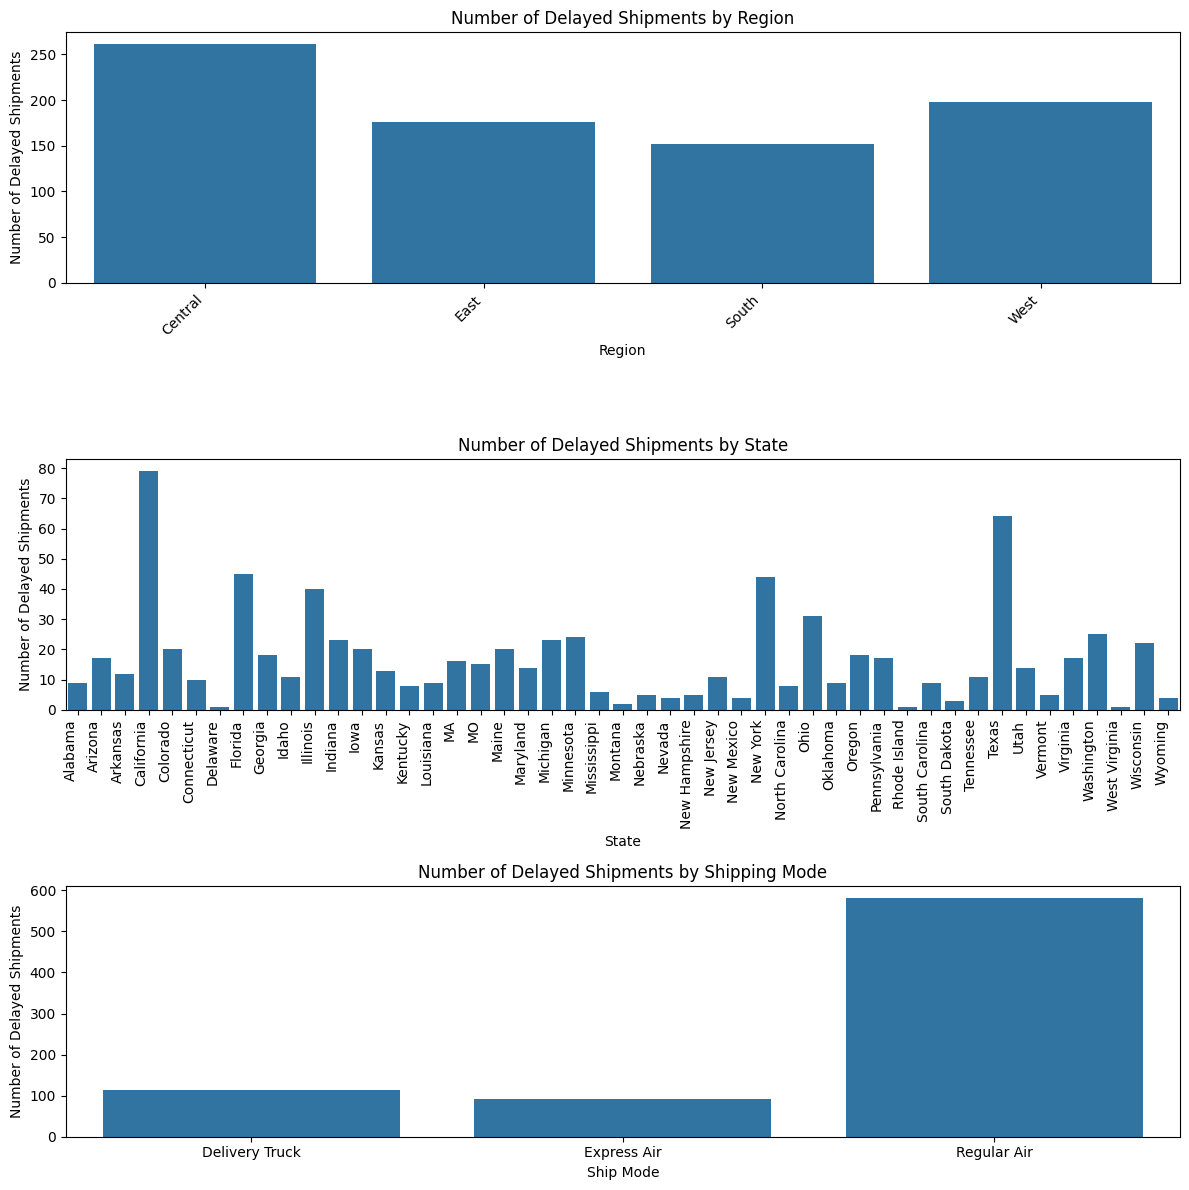

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
sns.barplot(x=delayed_by_region.index, y=delayed_by_region.values)
plt.title('Number of Delayed Shipments by Region')
plt.ylabel('Number of Delayed Shipments')
plt.xticks(rotation=45, ha='right')

plt.subplot(3, 1, 2)
sns.barplot(x=delayed_by_state.index, y=delayed_by_state.values)
plt.title('Number of Delayed Shipments by State')
plt.ylabel('Number of Delayed Shipments')
plt.xticks(rotation=90, ha='right')

plt.subplot(3, 1, 3)
sns.barplot(x=delayed_by_ship_mode.index, y=delayed_by_ship_mode.values)
plt.title('Number of Delayed Shipments by Shipping Mode')
plt.ylabel('Number of Delayed Shipments')

plt.tight_layout()
plt.show()

In [ ]:
max_delay = data['shipping_duration'].max()
order_with_max_delay = data[data['shipping_duration'] == max_delay]

In [ ]:
print(order_with_max_delay[['Order ID', 'shipping_duration', 'order_date', 'ship_date']])

      Order ID  shipping_duration order_date  ship_date
4290       353                 92 2013-12-30 2014-04-01


In [ ]:
min_delay = data['shipping_duration'].min()
order_with_min_delay = data[data['shipping_duration'] == min_delay]

In [ ]:
print(order_with_min_delay[['Order ID', 'shipping_duration', 'order_date', 'ship_date']])

      Order ID  shipping_duration order_date  ship_date
2        37537                  0 2012-01-02 2012-01-02
3        44069                  0 2012-01-02 2012-01-02
21       57253                  0 2012-01-05 2012-01-05
22       57253                  0 2012-01-05 2012-01-05
36       48226                  0 2012-01-06 2012-01-06
...        ...                ...        ...        ...
8394     50950                  0 2015-12-30 2015-12-30
8395     25542                  0 2015-12-30 2015-12-30
8396     45127                  0 2015-12-30 2015-12-30
8397     49344                  0 2015-12-30 2015-12-30
8398     49344                  0 2015-12-30 2015-12-30

[991 rows x 4 columns]


In [ ]:
segment_data = data.groupby('Customer Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order Quantity': 'sum'
})

In [ ]:
print(data.columns)

Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code', 'order_date', 'ship_date',
       'order date', 'ship date', 'shipping_duration', 'delayed'],
      dtype='object')


In [ ]:
print(segment_data)

                         Sales         Profit  Order Quantity
Customer Segment                                             
Consumer          3.063611e+06  287959.983779           41760
Corporate         5.498905e+06  599745.924158           78517
Home Office       3.564764e+06  318354.095491           52807
Small Business    2.788321e+06  315707.956153           41693


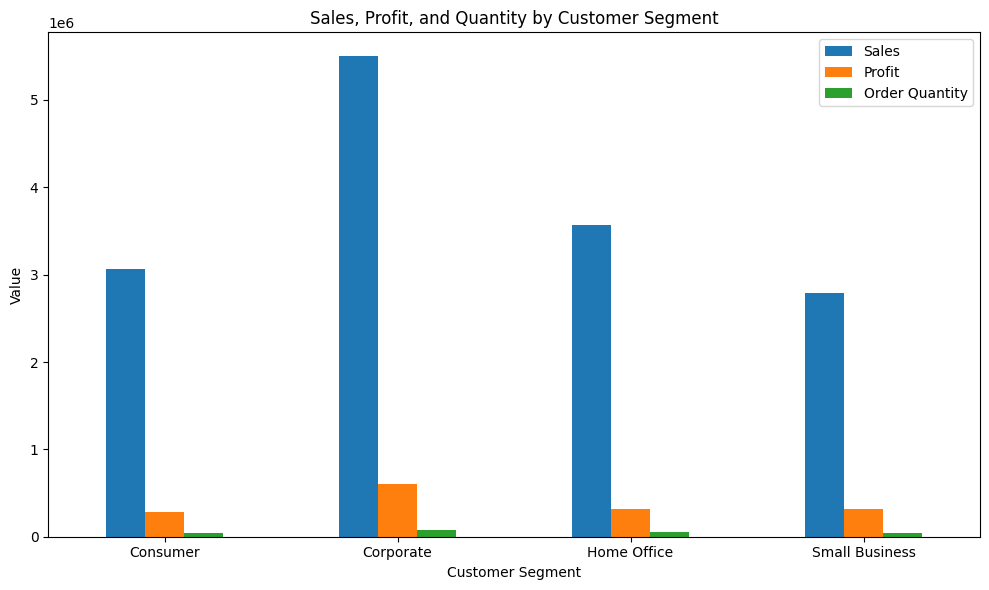

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

segment_data.plot(kind='bar', figsize=(10, 6))
plt.title('Sales, Profit, and Quantity by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Value')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for the corporate segment
corporate_data = data[data['Customer Segment'] == 'Corporate']

# Find the order with the highest sales
highest_sales_order = corporate_data.loc[corporate_data['Sales'].idxmax()]

# Print the order details
print(highest_sales_order[['Order ID', 'Sales']])

Order ID       30343
Sales       41343.21
Name: 7143, dtype: object


In [ ]:
print(segment_performance['Profit_Margin'].mean()
)

10.139774807817236


In [ ]:
# Calculate total sales and profit for each segment
segment_performance = data.groupby('Customer Segment').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
)

# Calculate profit margin for each segment
segment_performance['Profit_Margin'] = (
    segment_performance['Total_Profit'] / segment_performance['Total_Sales']
) * 100

# Sort segments by profit margin in descending order
segment_performance = segment_performance.sort_values(
    by=['Profit_Margin', 'Total_Sales'], ascending=[False, False]
)

# Calculate total sales and profit for each segment
segment_performance = data.groupby('Customer Segment').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
)

# Calculate profit margin for each segment
segment_performance['Profit_Margin'] = (
    segment_performance['Total_Profit'] / segment_performance['Total_Sales']
) * 100

# Sort segments by profit margin in descending order
segment_performance = segment_performance.sort_values(
    by=['Profit_Margin', 'Total_Sales'], ascending=[False, False]
)

# Display the results
print(segment_performance)
print('segment performance profit margin is =', segment_performance['Profit_Margin'].mean())

# You can further filter for high-value segments based on thresholds:
high_value_segments = segment_performance[
    segment_performance['Profit_Margin'] > segment_performance['Profit_Margin'].mean()
]
print("\nHigh-Value Segments:")
print(high_value_segments)


                   Total_Sales   Total_Profit  Profit_Margin
Customer Segment                                            
Small Business    2.788321e+06  315707.956153      11.322511
Corporate         5.498905e+06  599745.924158      10.906643
Consumer          3.063611e+06  287959.983779       9.399365
Home Office       3.564764e+06  318354.095491       8.930580
segment performance profit margin is = 10.139774807817236

High-Value Segments:
                   Total_Sales   Total_Profit  Profit_Margin
Customer Segment                                            
Small Business    2.788321e+06  315707.956153      11.322511
Corporate         5.498905e+06  599745.924158      10.906643


                         Sales         Profit  Order Quantity  Order ID  \
Customer Segment                                                          
Consumer          3.063611e+06  287959.983779           41760      1076   
Corporate         5.498905e+06  599745.924158           78517      2002   
Home Office       3.564764e+06  318354.095491           52807      1341   
Small Business    2.788321e+06  315707.956153           41693      1077   

                  Average Order Value  
Customer Segment                       
Consumer                  2847.222195  
Corporate                 2746.705733  
Home Office               2658.287752  
Small Business            2588.970278  


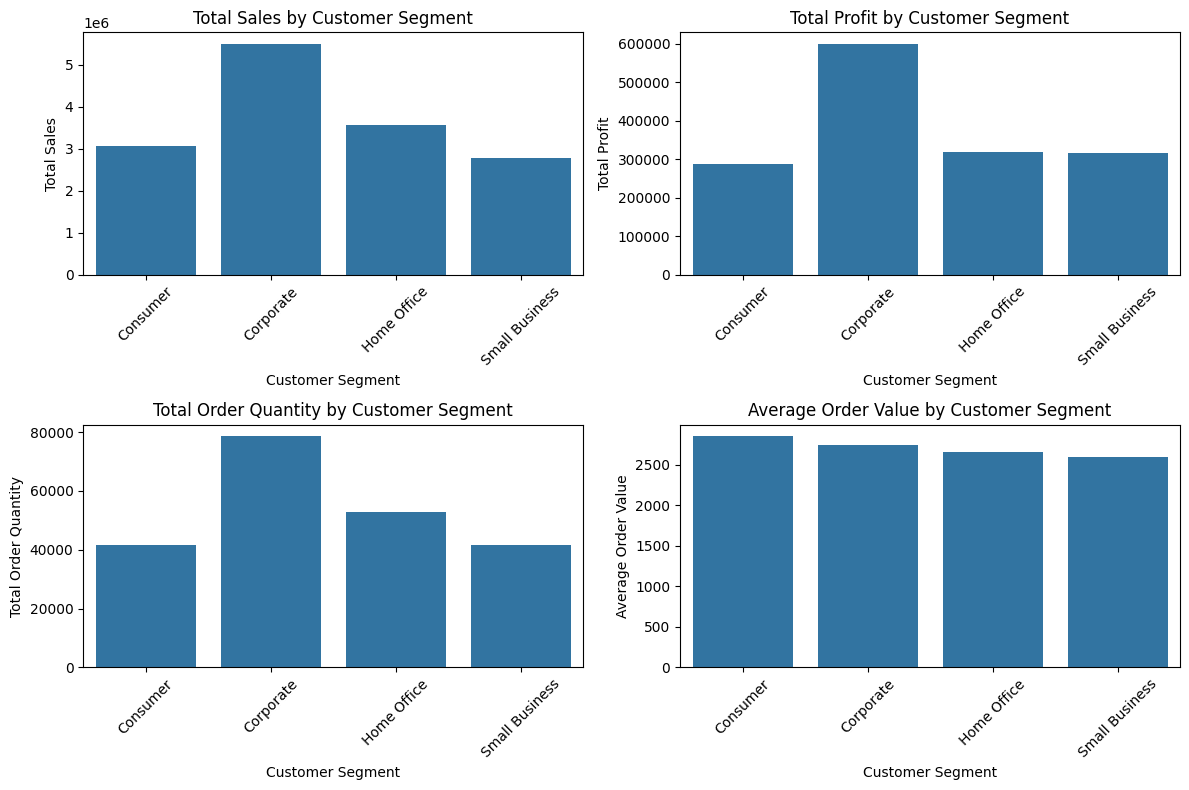

In [ ]:
segment_data = data.groupby('Customer Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order Quantity': 'sum',
    'Order ID': 'nunique'  # Add this line to count unique orders
})
segment_data['Average Order Value'] = segment_data['Sales'] / segment_data['Order ID']
print(segment_data)
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Sales
sns.barplot(x=segment_data.index, y=segment_data['Sales'], ax=axes[0, 0])
axes[0, 0].set_title('Total Sales by Customer Segment')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot Profit
sns.barplot(x=segment_data.index, y=segment_data['Profit'], ax=axes[0, 1])
axes[0, 1].set_title('Total Profit by Customer Segment')
axes[0, 1].set_ylabel('Total Profit')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot Order Quantity
sns.barplot(x=segment_data.index, y=segment_data['Order Quantity'], ax=axes[1, 0])
axes[1, 0].set_title('Total Order Quantity by Customer Segment')
axes[1, 0].set_ylabel('Total Order Quantity')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Average Order Value
sns.barplot(x=segment_data.index, y=segment_data['Average Order Value'], ax=axes[1, 1])
axes[1, 1].set_title('Average Order Value by Customer Segment')
axes[1, 1].set_ylabel('Average Order Value')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [ ]:
# Calculate total revenue
total_revenue = data['Sales'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

# Calculate revenue by customer segment
revenue_by_segment = data.groupby('Customer Segment')['Sales'].sum()
print("\nRevenue by Customer Segment:")
print(revenue_by_segment)

# Calculate revenue by product category
revenue_by_category = data.groupby('Product Category')['Sales'].sum()
print("\nRevenue by Product Category:")
print(revenue_by_category)

# Calculate revenue by region
revenue_by_region = data.groupby('Region')['Sales'].sum()
print("\nRevenue by Region:")
print(revenue_by_region)

Total Revenue: $14,915,600.82

Revenue by Customer Segment:
Customer Segment
Consumer          3.063611e+06
Corporate         5.498905e+06
Home Office       3.564764e+06
Small Business    2.788321e+06
Name: Sales, dtype: float64

Revenue by Product Category:
Product Category
Furniture          5178590.542
Office Supplies    3752762.100
Technology         5984248.182
Name: Sales, dtype: float64

Revenue by Region:
Region
Central    4.699167e+06
East       3.416466e+06
South      3.150219e+06
West       3.649748e+06
Name: Sales, dtype: float64


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data.isnull().sum()  # Check for missing values in each column

,0
City,0
Customer Age,903
Customer Name,0
Customer Segment,0
Discount,0
Number of Records,0
Order Date,0
Order ID,0
Order Priority,0
Order Quantity,0


In [ ]:
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)

<ipython-input-10-b7c731ef71c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product Base Margin'].fillna(data['Product Base Margin'].mean(), inplace=True)


In [ ]:
data.isnull().sum()  # Check for missing values in each column

,0
City,0
Customer Age,903
Customer Name,0
Customer Segment,0
Discount,0
Number of Records,0
Order Date,0
Order ID,0
Order Priority,0
Order Quantity,0


TIME SERIES ANALYSIS


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the 'Order Priority' column and transform it
data['Order Priority Encoded'] = encoder.fit_transform(data['Order Priority'])

# Now use the encoded column for scaling
scaler = MinMaxScaler()
data['Order Priority Scaled'] = scaler.fit_transform(data[['Order Priority Encoded']])

# Optionally, you can drop the original and encoded columns if needed
data.drop(['Order Priority', 'Order Priority Encoded'], axis=1, inplace=True)

In [ ]:
data.describe()[['Order Priority Scaled']] # call describe with parenthesis, select column with bracketsdata.describe()[['Order Priority Scaled']] # call describe with parenthesis, select column with brackets

,Order Priority Scaled
count,8399.000000
mean,0.499732
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000
std,0.350626


In [ ]:
print(data['Order Priority Scaled'])

0       0.25
1       1.00
2       0.50
3       0.00
4       0.50
        ... 
8394    1.00
8395    0.50
8396    0.75
8397    0.50
8398    0.50
Name: Order Priority Scaled, Length: 8399, dtype: float64


In [ ]:
# Replace 'order_date' with the actual date column name if it's different
data['year'] = data['Order Date'].dt.year  # Use 'order date' (with space)
data['month'] = data['Order Date'].dt.month # Use 'order date' (with space)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'time_series_column' is the column containing the time series data
result = adfuller(data['Order Date'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 36.38157562641804
p-value: 1.0
Critical Values: {'1%': -3.431129468704268, '5%': -2.8618844715320146, '10%': -2.5669533573312138}


In [1]:
from statsmodels.tsa.stattools import kpss
# Replace 'your_time_series_data' with the actual column name containing your time series data
kpss_statistic, p_value, lags, critical_values = kpss(daily_sales['Sales'], regression='c', nlags="auto")

# Print the results
print(f'KPSS Statistic: {kpss_statistic}')
print(f'p-value: {p_value}')
print(f'Lags Used: {lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')
if p_value < 0.05:
    print('The data is likely not stationary.')
else:
    print('The data is likely stationary.')

NameError: name 'daily_sales' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and 'time_series_column' is the column containing the time series data
result = adfuller(data['Ship Date'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 24.774819753806096
p-value: 1.0
Critical Values: {'1%': -3.431131238016276, '5%': -2.8618852533433805, '10%': -2.5669537734961305}


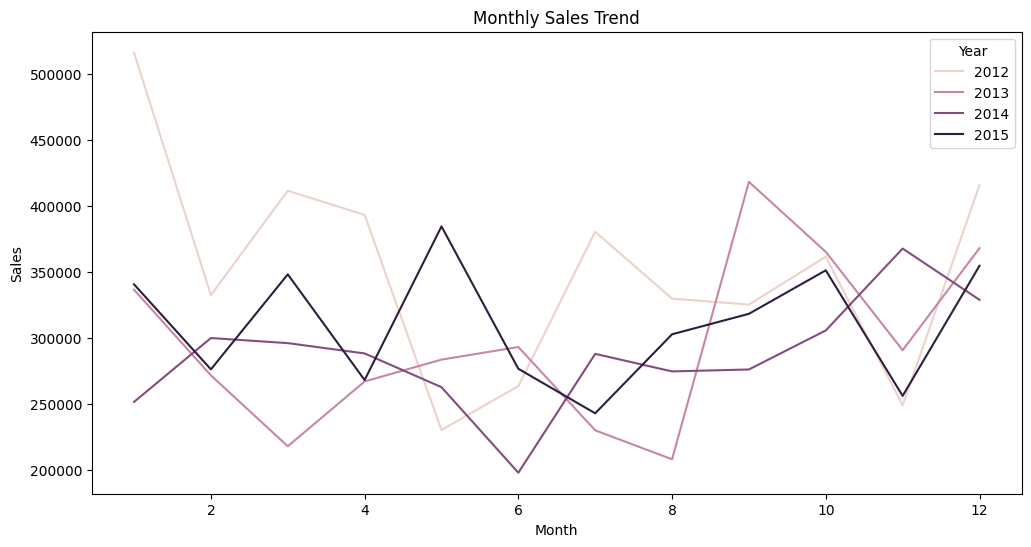

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Week'] = data['Order Date'].dt.isocalendar().week  # Optional
monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.show()


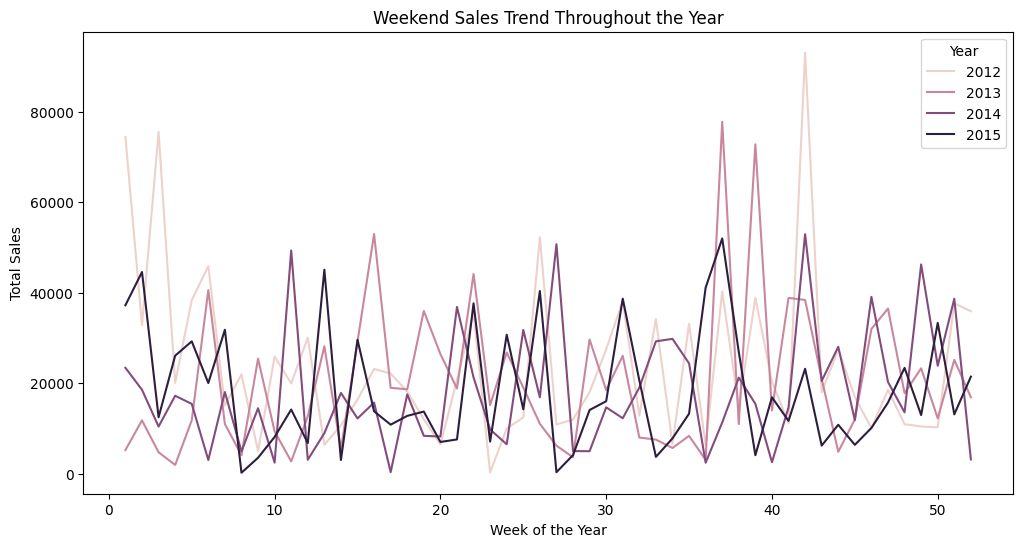

In [ ]:
data['IsWeekend'] = data['Order Date'].dt.dayofweek.isin([5, 6])  # 5: Saturday, 6: Sunday
weekend_sales = data[data['IsWeekend']].groupby(['Year', 'Week'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', hue='Year', data=weekend_sales)
plt.title('Weekend Sales Trend Throughout the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-9-b89f8633c6fc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nov_dec_2015['IsWeekend'] = data_nov_dec_2015['Order Date'].dt.dayofweek.isin([5, 6])


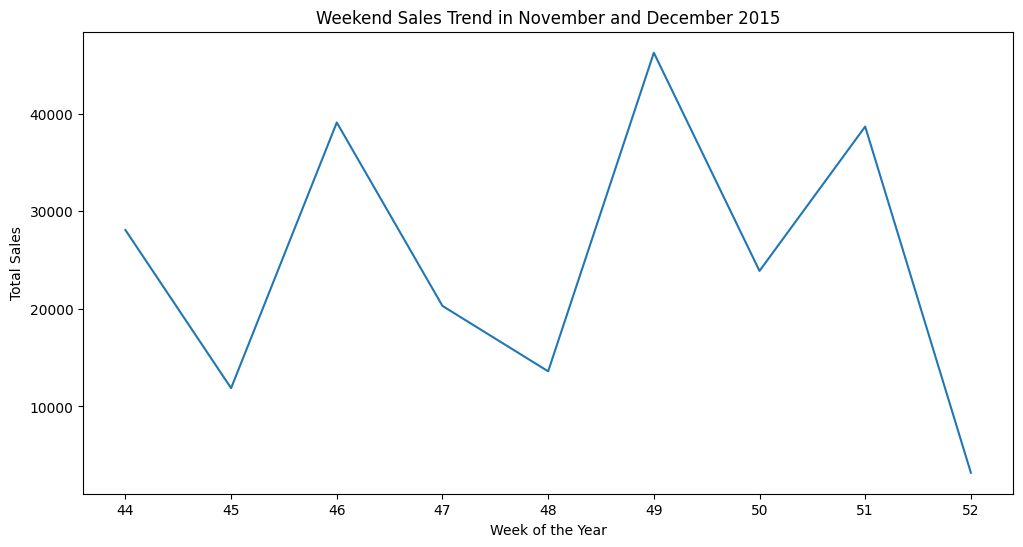

In [ ]:
data_nov_dec_2015 = data[
    (data['Order Date'].dt.year == 2014) &
    (data['Order Date'].dt.month.isin([11, 12]))
]
data_nov_dec_2015['IsWeekend'] = data_nov_dec_2015['Order Date'].dt.dayofweek.isin([5, 6])
weekend_sales_nov_dec_2015 = data_nov_dec_2015[data_nov_dec_2015['IsWeekend']].groupby(
    ['Week']  # You can also group by 'Order Date' for daily granularity
)['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', data=weekend_sales_nov_dec_2015)
plt.title('Weekend Sales Trend in November and December 2015')
plt.xlabel('Week of the Year')
plt.ylabel('Total Sales')
plt.show()